In [26]:
# Importação das bibliotecas a serem utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [62]:
# Leitura do nosso arquivo excel (Banco de dados)
file = '/content/Aula 7 - Dados_Desafio_Previsao_Vendas.xlsx'
df = pd.read_excel(file, parse_dates = True)

#df = pd.read_excel('/content/Aula 7 - Dados_Desafio_Previsao_Vendas.xlsx')
df.head()

,VENDEDOR,CLIENTE,PRODUTO,QUANTIDADE,UNIDADE_MEDIDA_NF,PREÇO_NF,DATA_NF,CRP_AJUSTADO,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
0,380.0,38797.0,254.0,30155.0,KGS,10.795,2010-06-19 00:00:00,5.287059,12.8843,166091.966200
1,379.0,36022.0,963.0,13149.0,KGS,5.780,2010-05-23 00:00:00,3.318824,6.0632,32362.009410
2,385.0,23397.0,1158.0,4602.0,KGS,11.300,2010-03-08 00:00:00,7.872941,14.4001,15771.324710
3,422.0,15430.0,112.0,13850.0,KGS,3.926,2010-04-26 00:00:00,3.911765,7.15,197.158824
4,380.0,6319.0,69.0,5347.0,KGS,44.390,2009-08-24 00:00:00,4.109412,10.01,215380.305300


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16690 entries, 0 to 16689
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VENDEDOR           16690 non-null  float64
 1   CLIENTE            16690 non-null  float64
 2   PRODUTO            16690 non-null  float64
 3   QUANTIDADE         16690 non-null  float64
 4   UNIDADE_MEDIDA_NF  16690 non-null  object 
 5   PREÇO_NF           16690 non-null  float64
 6   DATA_NF            16690 non-null  object 
 7   CRP_AJUSTADO       16690 non-null  float64
 8   VLR_PRECO_LISTA    16690 non-null  object 
 9   VLR_CONTRIBUICAO   16690 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.3+ MB


In [66]:
df.isna().sum()

VENDEDOR             0
CLIENTE              0
PRODUTO              0
QUANTIDADE           0
UNIDADE_MEDIDA_NF    0
PREÇO_NF             0
DATA_NF              0
CRP_AJUSTADO         0
VLR_PRECO_LISTA      0
VLR_CONTRIBUICAO     0
dtype: int64

In [68]:
df.describe()

,VENDEDOR,CLIENTE,PRODUTO,QUANTIDADE,PREÇO_NF,CRP_AJUSTADO,VLR_CONTRIBUICAO
count,16690.000000,16690.000000,16690.000000,16690.000000,16690.000000,16690.000000,16690.000000
mean,354.920132,21781.291072,353.885321,1498.689455,22.712701,8.808834,8841.444155
std,42.349895,10531.812495,470.760665,3105.141894,69.610306,22.542751,22624.107889
min,47.000000,13.000000,1.000000,0.000000,0.910000,0.584706,-6871.449412
25%,324.000000,12748.000000,60.000000,219.000000,6.136000,2.552941,1452.670721
50%,335.000000,23390.000000,121.000000,525.000000,9.867000,4.068235,3048.211294
75%,389.000000,30531.000000,411.000000,1446.000000,17.810000,7.179118,7559.073706
max,445.000000,39214.000000,1649.000000,53630.000000,1464.359000,669.092941,397882.403600


In [75]:
df['VENDEDOR'] = df['VENDEDOR'].astype(str)
df['CLIENTE'] = df['CLIENTE'].astype(str)
df['PRODUTO'] = df['PRODUTO'].astype(str)
df['QUANTIDADE'] = df['QUANTIDADE'].astype(str)


df.dtypes

VENDEDOR              object
CLIENTE               object
PRODUTO               object
QUANTIDADE            object
UNIDADE_MEDIDA_NF     object
PREÇO_NF             float64
DATA_NF               object
CRP_AJUSTADO         float64
VLR_PRECO_LISTA       object
VLR_CONTRIBUICAO     float64
dtype: object

## Sazonalidade e Tendencia

In [61]:
df = pd.read_excel(file, parse_dates = True)

df

,VENDEDOR,CLIENTE,PRODUTO,QUANTIDADE,UNIDADE_MEDIDA_NF,PREÇO_NF,DATA_NF,CRP_AJUSTADO,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
0,380.0,38797.0,254.0,30155.0,KGS,10.79500,2010-06-19 00:00:00,5.287059,12.8843,166091.966200
1,379.0,36022.0,963.0,13149.0,KGS,5.78000,2010-05-23 00:00:00,3.318824,6.0632,32362.009410
2,385.0,23397.0,1158.0,4602.0,KGS,11.30000,2010-03-08 00:00:00,7.872941,14.4001,15771.324710
3,422.0,15430.0,112.0,13850.0,KGS,3.92600,2010-04-26 00:00:00,3.911765,7.15,197.158824
4,380.0,6319.0,69.0,5347.0,KGS,44.39000,2009-08-24 00:00:00,4.109412,10.01,215380.305300
...,...,...,...,...,...,...,...,...,...,...
16685,318.0,23353.0,256.0,1753.0,KGS,245.83806,2010-06-03 00:00:00,50.268235,168.7686,342833.902700
16686,318.0,23353.0,256.0,2103.0,KGS,218.57511,2010-10-02 00:00:00,47.814118,175.1035,359110.366900
16687,318.0,23353.0,256.0,2103.0,KGS,233.59089,2010-09-03 00:00:00,55.752941,187.1584,373993.206400
16688,318.0,23353.0,256.0,1753.0,KGS,257.11803,2010-07-02 00:00:00,52.582353,176.5049,358551.041900


In [28]:
# Verificar se existe valores nulos no nosso banco de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16690 entries, 0 to 16689
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VENDEDOR           16690 non-null  float64
 1   CLIENTE            16690 non-null  float64
 2   PRODUTO            16690 non-null  float64
 3   QUANTIDADE         16690 non-null  float64
 4   UNIDADE_MEDIDA_NF  16690 non-null  object 
 5   PREÇO_NF           16690 non-null  float64
 6   DATA_NF            16690 non-null  object 
 7   CRP_AJUSTADO       16690 non-null  float64
 8   VLR_PRECO_LISTA    16690 non-null  object 
 9   VLR_CONTRIBUICAO   16690 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.3+ MB


In [29]:
# Verificar os tipos das variáveis

df.dtypes

VENDEDOR             float64
CLIENTE              float64
PRODUTO              float64
QUANTIDADE           float64
UNIDADE_MEDIDA_NF     object
PREÇO_NF             float64
DATA_NF               object
CRP_AJUSTADO         float64
VLR_PRECO_LISTA       object
VLR_CONTRIBUICAO     float64
dtype: object

In [30]:
# Mostrar detalhes como a média, desvio, mínimo, porcentagem e o máximo

df.describe()

,VENDEDOR,CLIENTE,PRODUTO,QUANTIDADE,PREÇO_NF,CRP_AJUSTADO,VLR_CONTRIBUICAO
count,16690.000000,16690.000000,16690.000000,16690.000000,16690.000000,16690.000000,16690.000000
mean,354.920132,21781.291072,353.885321,1498.689455,22.712701,8.808834,8841.444155
std,42.349895,10531.812495,470.760665,3105.141894,69.610306,22.542751,22624.107889
min,47.000000,13.000000,1.000000,0.000000,0.910000,0.584706,-6871.449412
25%,324.000000,12748.000000,60.000000,219.000000,6.136000,2.552941,1452.670721
50%,335.000000,23390.000000,121.000000,525.000000,9.867000,4.068235,3048.211294
75%,389.000000,30531.000000,411.000000,1446.000000,17.810000,7.179118,7559.073706
max,445.000000,39214.000000,1649.000000,53630.000000,1464.359000,669.092941,397882.403600


In [31]:
# Removendo colunas que não serão utilizadas em nossas análises

df1 = df.drop(['VENDEDOR', 'CLIENTE', 'CRP_AJUSTADO', 'UNIDADE_MEDIDA_NF'], axis=1, inplace = True)


In [32]:
# Fazendo o agrupamento por produto e a soma geral do nosso banco de dados
# Para visualizar a soma da Quantidade e Preço_NF 

n_by_product = df.groupby(["PRODUTO"]).sum()

n_by_product

,QUANTIDADE,PREÇO_NF,VLR_CONTRIBUICAO
PRODUTO,,,
1.0,87900.0,312.45253,2.980310e+05
2.0,653698.0,3974.32581,2.830418e+06
3.0,623181.0,1926.80072,1.778279e+06
4.0,151794.0,3606.49744,7.402461e+05
6.0,157877.0,2174.28900,8.073150e+05
...,...,...,...
1605.0,8.0,240.65600,1.097304e+03
1626.0,333.0,8.74900,1.322852e+03
1641.0,504.0,2.10600,6.505158e+02


In [33]:
# Mudando o tipo para float da coluna 'PRODUTO'

df['PRODUTO'] = df['PRODUTO'].astype(float)

In [34]:
print(df.groupby('QUANTIDADE')['PRODUTO'].count())

QUANTIDADE
0.0         1
1.0        19
3.0        10
5.0         6
7.0         2
           ..
34976.0     2
36641.0    19
36904.0     1
39972.0     7
53630.0     1
Name: PRODUTO, Length: 622, dtype: int64


In [35]:
#Ordenando produto com maior quantidade de vendas

df3 = df.sort_values(by='QUANTIDADE', ascending= False, inplace = True)

In [36]:
# Pegando pelo ID do vendedor que mais vendeu
df[df.index == 14938]

,PRODUTO,QUANTIDADE,PREÇO_NF,DATA_NF,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
14938,3.0,53630.0,3.276,2010-05-07 00:00:00,3.9468,77201.96235


In [37]:
# Selecionando apenas o produto '3'

df3 = df.loc[df['PRODUTO'] == 3]

In [38]:
# Corrigindo a data para ficar no formato de datatime

df['DATA_NF']= pd.to_datetime(df['DATA_NF'], format='%Y-%m-%d', errors='coerce')

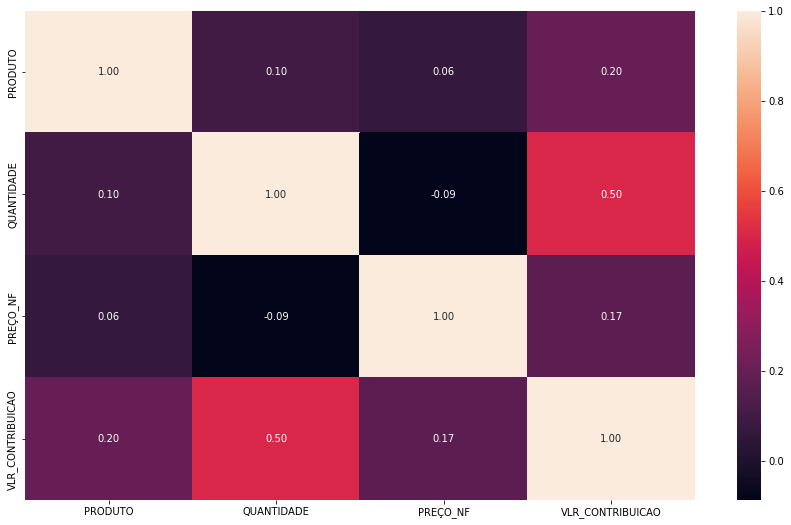

In [39]:
# Plotando o gráfico de calor com a correlação de pearson

plt.rcParams['figure.figsize'] = (15,9)
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f')

In [40]:
# Ajustando a data numa nova coluna para que fique em Mês e Ano

df['Mes'] = df['DATA_NF'].dt.strftime('%Y-%m')
df_mes = df.groupby(df['Mes'], as_index=False).sum()

df_mes.head()

,Mes,PRODUTO,QUANTIDADE,PREÇO_NF,VLR_CONTRIBUICAO
0,2009-01,237701.0,1216925.0,12366.76896,5.705050e+06
1,2009-02,242655.0,966048.0,11566.61974,5.024627e+06
2,2009-03,252742.0,1027397.0,15017.05725,4.986500e+06
3,2009-04,294709.0,1129511.0,16857.99947,6.649561e+06
4,2009-05,308006.0,1232642.0,17448.44062,7.253326e+06


In [41]:
# Outra forma de criar uma nova coluna 

# df_mes['mes'] = df['DATA_NF'].apply(lambda x: str(x)[5:7])
# df_mes.head()

In [42]:
# Criando duas colunas para fazer a nossa predição

series = df_mes[['Mes','QUANTIDADE']]



In [43]:
series.set_index('Mes', drop=False)

,Mes,QUANTIDADE
Mes,,
2009-01,2009-01,1216925.0
2009-02,2009-02,966048.0
2009-03,2009-03,1027397.0
2009-04,2009-04,1129511.0
2009-05,2009-05,1232642.0
2009-06,2009-06,1151371.0
2009-07,2009-07,1165243.0
2009-08,2009-08,1267980.0
2009-09,2009-09,960181.0


In [44]:
# Normalizando a coluna Mes para ficar em Mês e Ano e transformando o tipo em Datetime

series['Mes']= pd.to_datetime(series['Mes'], format='%Y-%m', errors='coerce')

series.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Mes           datetime64[ns]
QUANTIDADE           float64
dtype: object

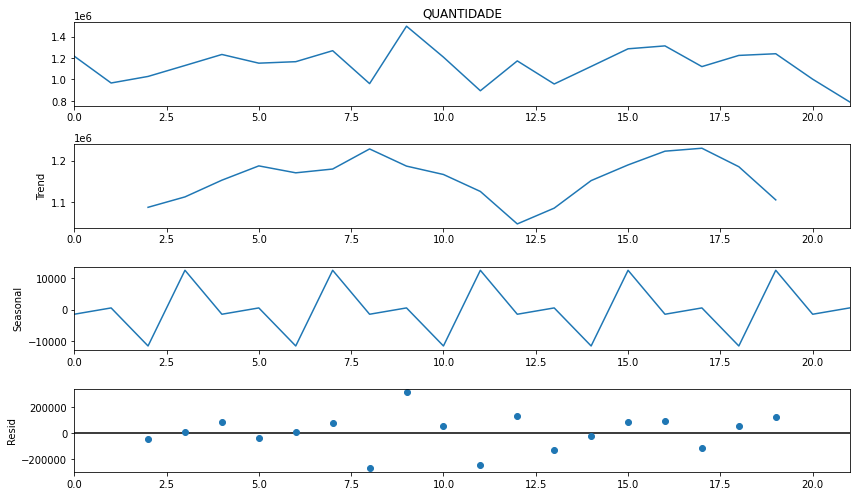

In [45]:
# Biblioteca para fazer a nossa decomposição

from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df_mes['QUANTIDADE'], period=4)

# Plot decomposition
fig = decomp.plot();
fig.set_size_inches((12, 7))
plt.tight_layout();

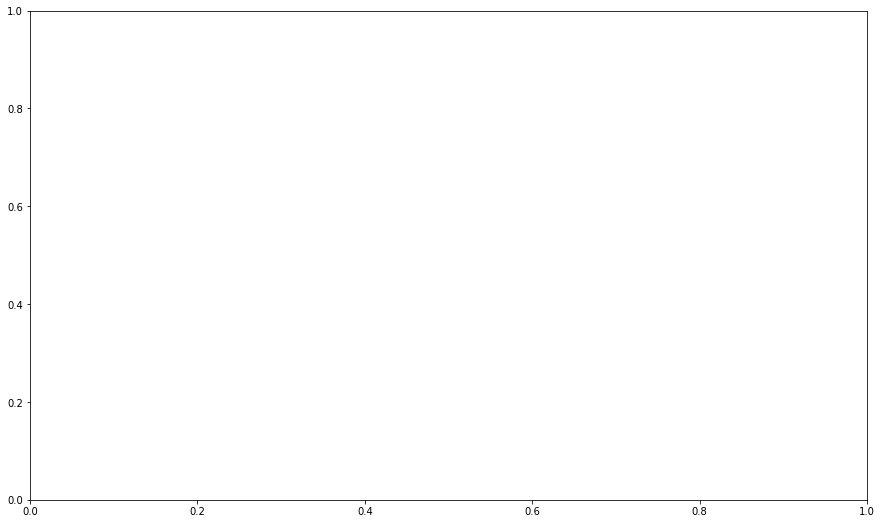

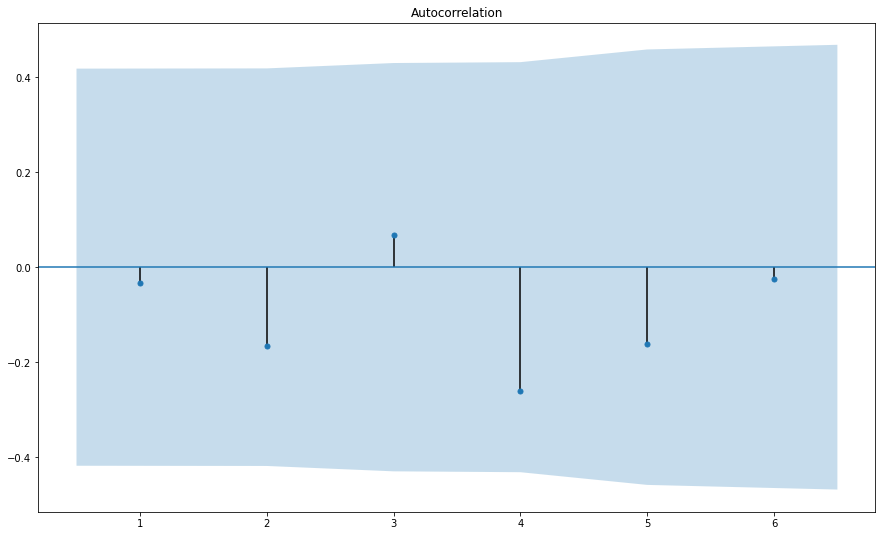

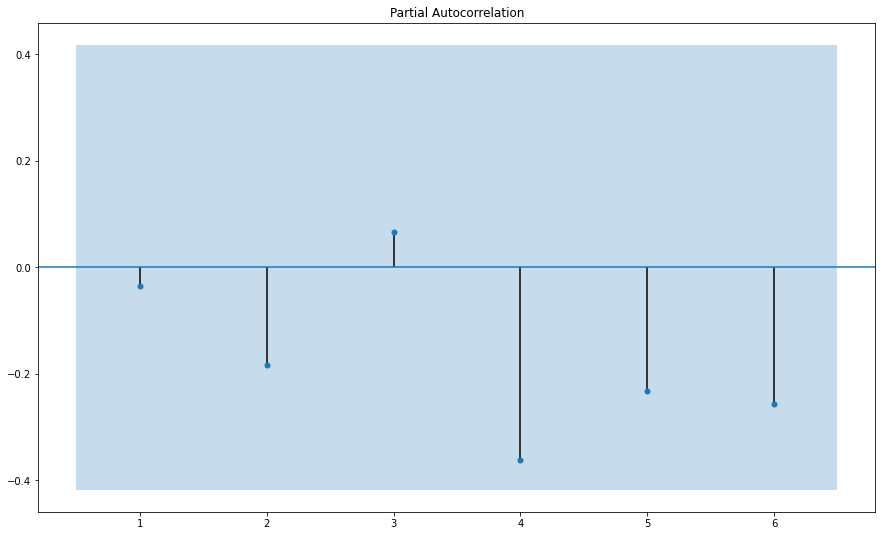

In [46]:
# Biblioteca para gerar os gráficos de autocorrelação e autocorrelação parcial

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(df_mes['QUANTIDADE'], lags=6, zero=False);
plot_pacf(df_mes['QUANTIDADE'], lags=6, zero=False);

In [47]:
# df = pd.get_dummies(df, columns=['DATA_NF'], drop_first= False)

In [48]:
series.head()

,Mes,QUANTIDADE
0,2009-01-01,1216925.0
1,2009-02-01,966048.0
2,2009-03-01,1027397.0
3,2009-04-01,1129511.0
4,2009-05-01,1232642.0


In [49]:
series = pd.read_excel(file, parse_dates =['DATA_NF'],index_col=0, squeeze=True)

series['DATA_NF']= pd.to_datetime(series['DATA_NF'], format='%Y-%m', errors='coerce')

# Veja agora o recurso 'Month' é do tipo datetime
series.head()

,CLIENTE,PRODUTO,QUANTIDADE,UNIDADE_MEDIDA_NF,PREÇO_NF,DATA_NF,CRP_AJUSTADO,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
VENDEDOR,,,,,,,,,
380.0,38797.0,254.0,30155.0,KGS,10.795,2010-06-19,5.287059,12.8843,166091.966200
379.0,36022.0,963.0,13149.0,KGS,5.780,2010-05-23,3.318824,6.0632,32362.009410
385.0,23397.0,1158.0,4602.0,KGS,11.300,2010-03-08,7.872941,14.4001,15771.324710
422.0,15430.0,112.0,13850.0,KGS,3.926,2010-04-26,3.911765,7.15,197.158824
380.0,6319.0,69.0,5347.0,KGS,44.390,2009-08-24,4.109412,10.01,215380.305300


In [50]:
series.reset_index(drop=True, inplace = True)

In [51]:
series1 = series.drop(['CLIENTE', 'PRODUTO', 'CRP_AJUSTADO', 'UNIDADE_MEDIDA_NF', 'PREÇO_NF', 'VLR_PRECO_LISTA', 'VLR_CONTRIBUICAO'], axis=1, inplace = True)


In [52]:
# series.apply(pd.to_numeric, downcast="integer", errors="ignore")


In [53]:
series.dtypes


QUANTIDADE           float64
DATA_NF       datetime64[ns]
dtype: object

In [54]:
series.head()

,QUANTIDADE,DATA_NF
0,30155.0,2010-06-19
1,13149.0,2010-05-23
2,4602.0,2010-03-08
3,13850.0,2010-04-26
4,5347.0,2009-08-24


In [55]:
series.set_index('DATA_NF', inplace=True)

In [56]:
series.head()
# series = series.set_index('DATA_NF')

,QUANTIDADE
DATA_NF,
2010-06-19,30155.0
2010-05-23,13149.0
2010-03-08,4602.0
2010-04-26,13850.0
2009-08-24,5347.0


In [57]:
series.index = pd.to_datetime(series.index)
series.dtypes
type(series.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [58]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

#Aqui vamos criar três ajustes nos quais tomaremos três valores diferentes 
#de alpha (valores do nível de suavização): 0.2; 0.8 e valor otimizado 
#automaticamente pelo statsmodel que é o recomendado.

fit1 = SimpleExpSmoothing(series).fit(
    smoothing_level=0.2, optimized=False);
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$");

fit2 = SimpleExpSmoothing(series).fit(
    smoothing_level=0.8, optimized=False);

fcast2 = fit2.forecast(3).rename(r"$\alpha=0.8$");


fit3 = SimpleExpSmoothing(series).fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 8));
plt.plot(series, marker="o", color="black");

plt.plot(fit1.fittedvalues, marker="o", color="blue");
(line1,) = plt.plot(fcast1, marker="o", color="blue");
plt.plot(fit2.fittedvalues, marker="o", color="red");
(line2,) = plt.plot(fcast2, marker="o", color="red");

plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")

plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f7ab2c69710> (for post_execute):


ValueError: ignored

ValueError: ignored

In [59]:
series.dtypes

QUANTIDADE    float64
dtype: object